<a href="https://colab.research.google.com/github/Vikas8719/My-first-model/blob/main/Ecommerce_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv(r'/content/Ecommerce_Sales_Data_2024_2025.csv')


In [3]:
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [4]:
df.shape

(5000, 14)

In [5]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Region', 'City', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Unit Price', 'Discount',
       'Sales', 'Profit', 'Payment Mode'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [7]:
df.describe()

,Order ID,Quantity,Unit Price,Discount,Sales,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12500.500000,2.992600,39760.904600,10.051000,106733.204870,15941.746982
std,1443.520003,1.413133,22831.783946,7.084662,85108.208202,14897.684916
min,10001.000000,1.000000,222.000000,0.000000,264.100000,19.120000
25%,11250.750000,2.000000,20312.250000,5.000000,39766.537500,4892.295000
50%,12500.500000,3.000000,39459.500000,10.000000,83080.325000,11108.525000
75%,13750.250000,4.000000,59721.750000,15.000000,156968.587500,22467.987500
max,15000.000000,5.000000,79998.000000,20.000000,398485.000000,89688.440000


In [8]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer Name,0
Region,0
City,0
Category,0
Sub-Category,0
Product Name,0
Quantity,0
Unit Price,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

,0
Order ID,5000
Order Date,730
Customer Name,4844
Region,4
City,20
Category,10
Sub-Category,50
Product Name,3835
Quantity,5
Unit Price,4841


In [11]:
df.drop(['Customer Name','Order ID'],inplace=True,axis=1)

In [12]:
df.head()

,Order Date,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,2024-10-19,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,2025-08-30,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,2023-11-04,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,2025-05-23,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,2025-01-19,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [13]:
numeric_columns=['Unit Price','Discount','Sales','Profit']

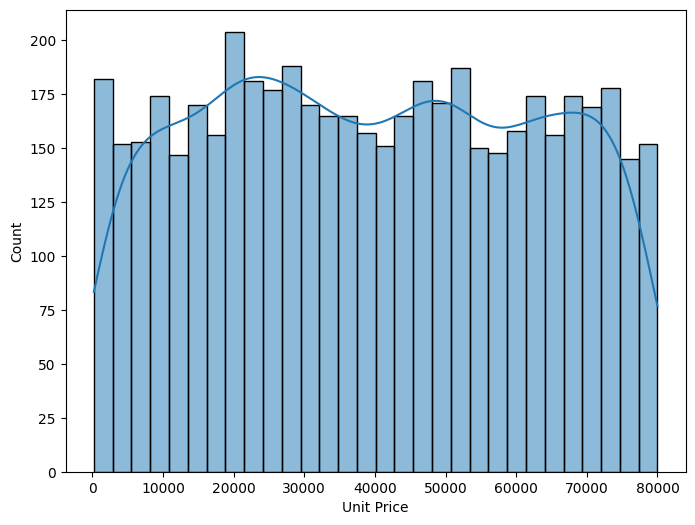

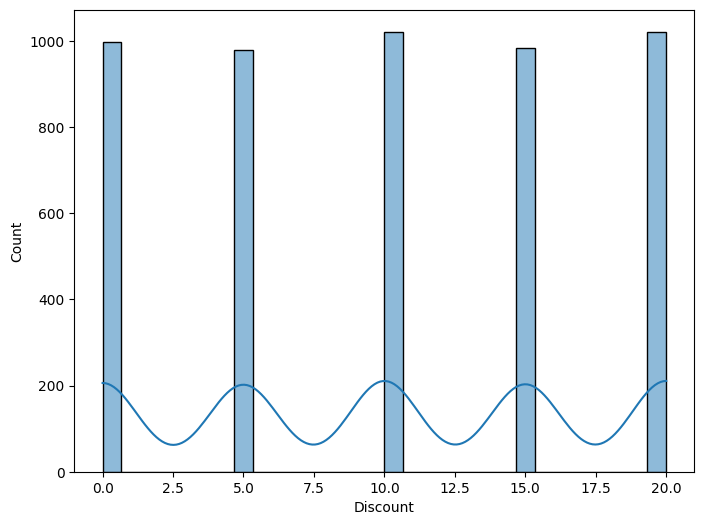

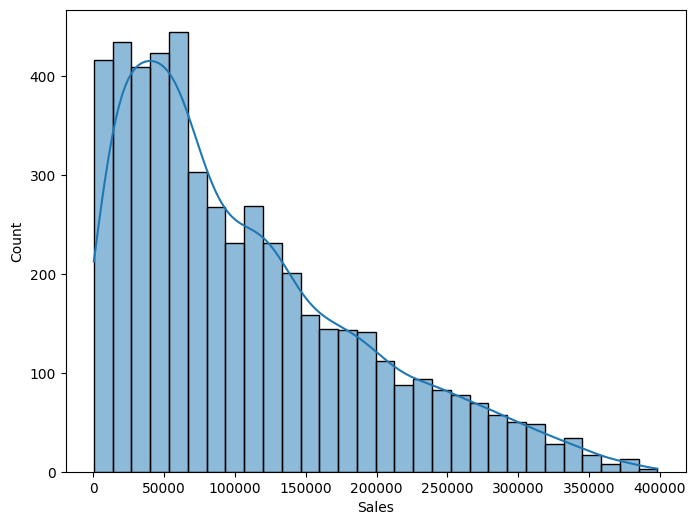

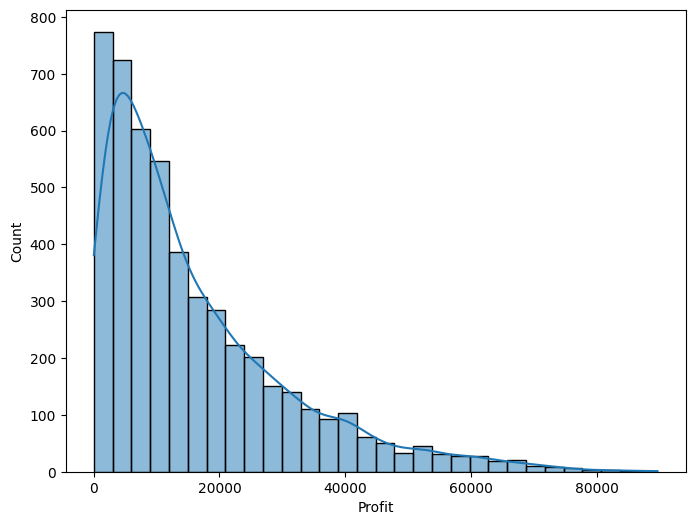

In [14]:
for col in numeric_columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=30)


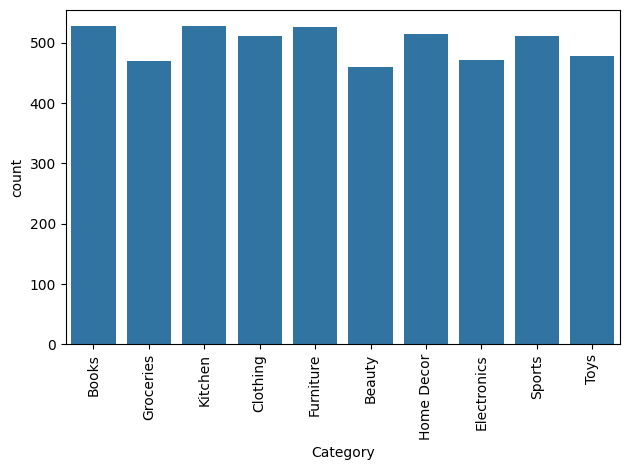

In [15]:
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.tight_layout()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Non-Fiction'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Juicer'),
  Text(3, 0, 'Oil'),
  Text(4, 0, 'Kids Wear'),
  Text(5, 0, 'Chair'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Spices'),
  Text(9, 0, 'Cookware Set'),
  Text(10, 0, 'Perfume'),
  Text(11, 0, 'Vase'),
  Text(12, 0, "Women's Wear"),
  Text(13, 0, 'Laptop'),
  Text(14, 0, 'Smartwatch'),
  Text(15, 0, 'Dumbbells'),
  Text(16, 0, 'Textbook'),
  Text(17, 0, 'Refrigerator'),
  Text(18, 0, 'Wheat'),
  Text(19, 0, 'Comics'),
  Text(20, 0, 'Face Cream'),
  Text(21, 0, 'Headphones'),
  Text(22, 0, 'Foundation'),
  Text(23, 0, 'Table'),
  Text(24, 0, 'RC Car'),
  Text(25, 0, 'Sugar'),
  Text(26, 0, 'Cricket B

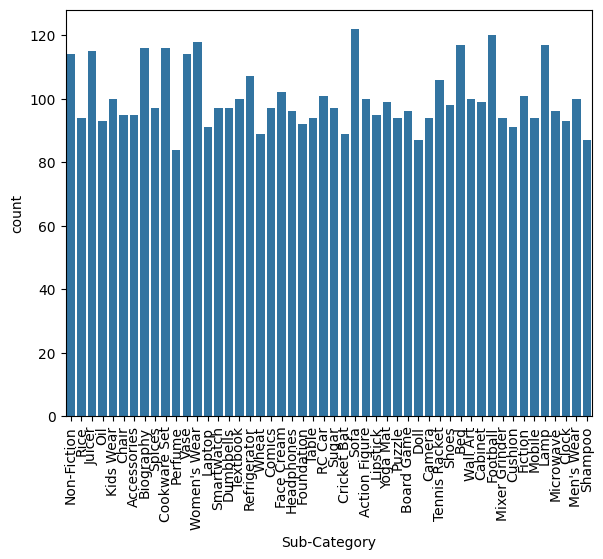

In [16]:
sns.countplot(x=df['Sub-Category'])
plt.tight_layout()
plt.xticks(rotation=90)

<Axes: xlabel='Region', ylabel='count'>

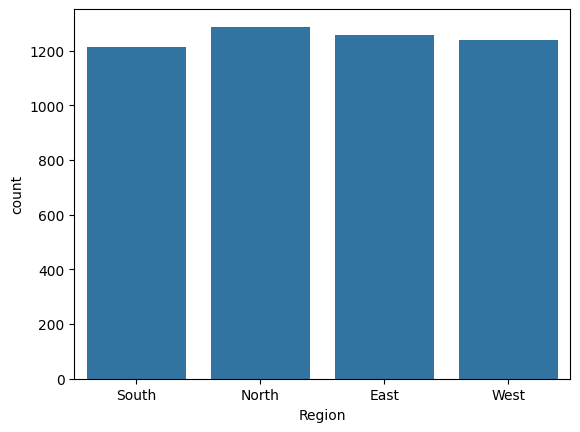

In [17]:
sns.countplot(x=df['Region'])


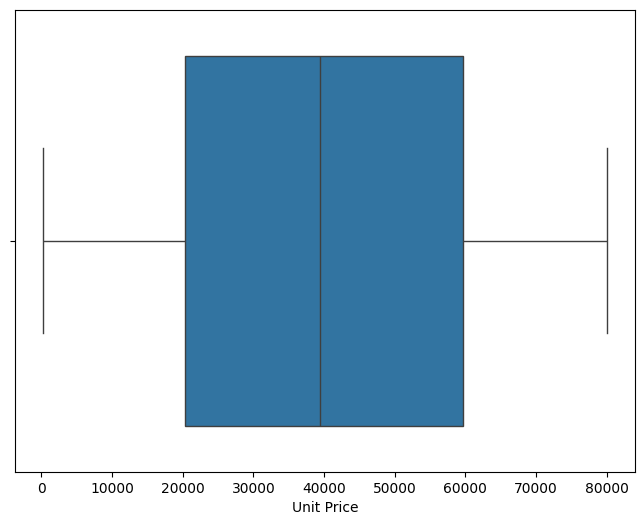

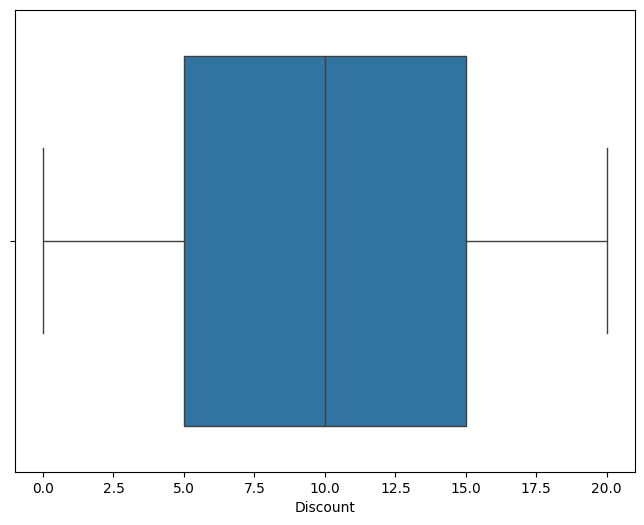

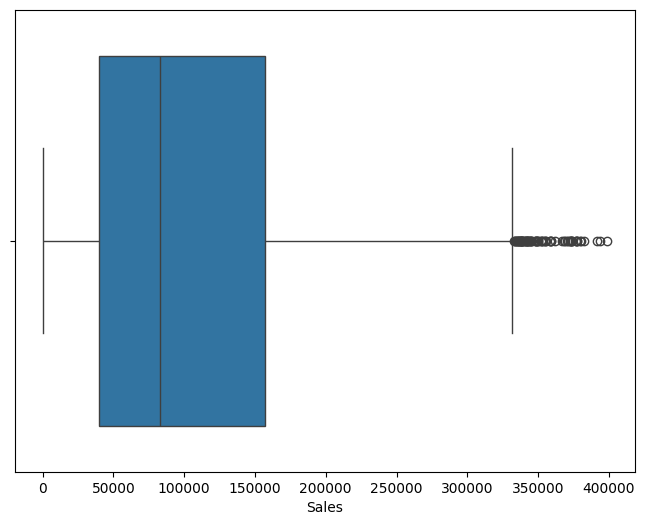

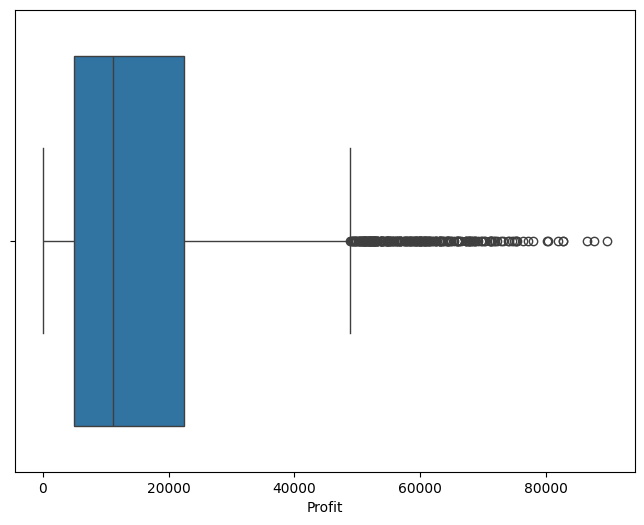

In [18]:
for col in numeric_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])

<Axes: >

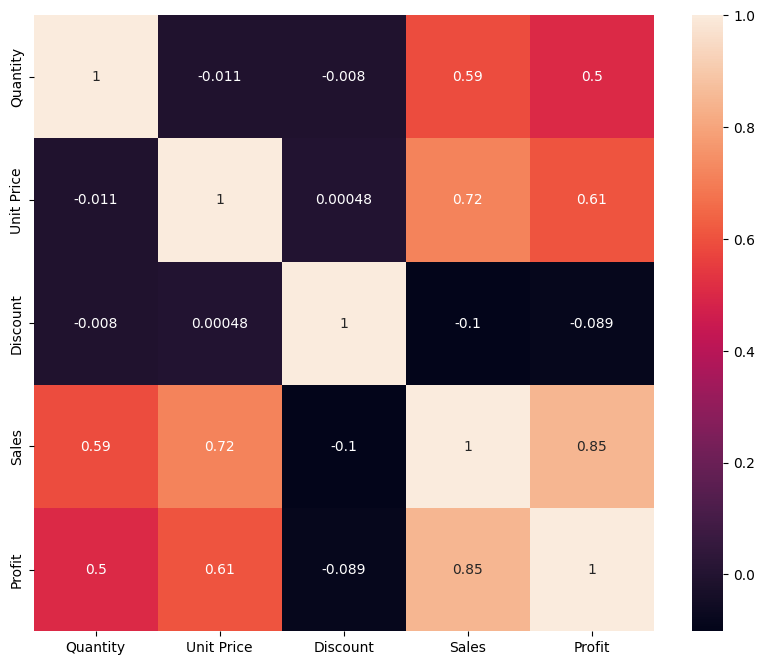

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)



In [20]:
df.head()

,Order Date,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,2024-10-19,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,2025-08-30,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,2023-11-04,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,2025-05-23,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,2025-01-19,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [21]:
df['Region'].value_counts()

,count
Region,
North,1288
East,1256
West,1241
South,1215


In [22]:
categorical_cols = ['Region', 'City', 'Category', 'Sub-Category', 'Payment Mode']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [23]:
df.head()

,Order Date,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2024-10-19,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2025-08-30,Rice Nemo,1,42165,20,33732.0,6299.66,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2023-11-04,Juicer Odio,4,64876,20,207603.2,19850.27,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2025-05-23,Oil Doloribus,5,37320,15,158610.0,36311.02,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2025-01-19,Kids Wear Quo,1,50037,10,45033.3,9050.04,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()
df['Quarter'] = df['Order Date'].dt.quarter
df['Is_Weekend'] = df['Order Date'].dt.weekday >= 5
df = pd.get_dummies(df, columns=['Weekday', 'Is_Weekend'], drop_first=True)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df = df.drop(['Order Date'], axis=1)


In [25]:
df.head()

,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Region_North,Region_South,Region_West,City_Amritsar,...,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Is_Weekend_True,Month_sin,Month_cos,Day_sin,Day_cos
0,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,False,True,False,False,...,True,False,False,False,False,True,-0.866025,0.500000,-0.651372,-0.758758
1,Rice Nemo,1,42165,20,33732.0,6299.66,True,False,False,False,...,True,False,False,False,False,True,-0.866025,-0.500000,-0.201299,0.979530
2,Juicer Odio,4,64876,20,207603.2,19850.27,False,False,False,False,...,True,False,False,False,False,True,-0.500000,0.866025,0.724793,0.688967
3,Oil Doloribus,5,37320,15,158610.0,36311.02,False,False,False,False,...,False,False,False,False,False,False,0.500000,-0.866025,-0.998717,-0.050649
4,Kids Wear Quo,1,50037,10,45033.3,9050.04,False,False,True,False,...,False,True,False,False,False,True,0.500000,0.866025,-0.651372,-0.758758


In [26]:

bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


In [27]:
df['Product_Avg_Sales'] = df.groupby('Product Name')['Sales'].transform('mean')
df['Product_Avg_Profit'] = df.groupby('Product Name')['Profit'].transform('mean')
df['Product_Order_Count'] = df.groupby('Product Name')['Quantity'].transform('count')


In [28]:
df = df.drop('Product Name', axis=1)


In [29]:
df.head()

,Quantity,Unit Price,Discount,Sales,Profit,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,...,Weekday_Tuesday,Weekday_Wednesday,Is_Weekend_True,Month_sin,Month_cos,Day_sin,Day_cos,Product_Avg_Sales,Product_Avg_Profit,Product_Order_Count
0,2,36294,5,68958.6,10525.09,0,1,0,0,1,...,0,0,1,-0.866025,0.500000,-0.651372,-0.758758,178956.800000,25479.505000,2
1,1,42165,20,33732.0,6299.66,1,0,0,0,0,...,0,0,1,-0.866025,-0.500000,-0.201299,0.979530,40187.450000,6750.535000,2
2,4,64876,20,207603.2,19850.27,0,0,0,0,0,...,0,0,1,-0.500000,0.866025,0.724793,0.688967,91628.666667,10663.603333,3
3,5,37320,15,158610.0,36311.02,0,0,0,0,0,...,0,0,0,0.500000,-0.866025,-0.998717,-0.050649,158610.000000,36311.020000,1
4,1,50037,10,45033.3,9050.04,0,0,1,0,0,...,0,0,1,0.500000,0.866025,-0.651372,-0.758758,40532.850000,6372.065000,2


In [30]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [32]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.1 MB/s eta 0:00:00


In [33]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.7 MB/s eta 0:00:00


In [34]:
# -------------------------------

import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Optional CatBoost
try:
    import catboost as cb
    CATBOOST_INSTALLED = True
except:
    CATBOOST_INSTALLED = False
    print("CatBoost not installed, skipping it.")

# -------------------------------

def objective(trial):
    # Available models
    models = ["DecisionTree", "RandomForest", "XGBoost", "LightGBM"]
    if CATBOOST_INSTALLED:
        models.append("CatBoost")

    model_name = trial.suggest_categorical("model", models)

    if model_name == "DecisionTree":
        max_depth = trial.suggest_int("dt_max_depth", 3, 20)
        min_samples_split = trial.suggest_int("dt_min_samples_split", 2, 20)
        model = DecisionTreeRegressor(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)

    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 500)
        max_depth = trial.suggest_int("rf_max_depth", 3, 20)
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 20)
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      n_jobs=-1,
                                      random_state=42)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 15)
        learning_rate = trial.suggest_float("xgb_lr", 0.01, 0.3)
        subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
        model = xgb.XGBRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 learning_rate=learning_rate,
                                 subsample=subsample,
                                 n_jobs=-1,
                                 random_state=42,
                                 tree_method='hist')

    elif model_name == "LightGBM":
        n_estimators = trial.suggest_int("lgb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("lgb_max_depth", 3, 20)
        learning_rate = trial.suggest_float("lgb_lr", 0.01, 0.3)
        num_leaves = trial.suggest_int("lgb_num_leaves", 20, 150)
        model = lgb.LGBMRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  num_leaves=num_leaves,
                                  n_jobs=-1,
                                  random_state=42)

    else:  # CatBoost
        n_estimators = trial.suggest_int("cb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("cb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("cb_lr", 0.01, 0.3)
        model = cb.CatBoostRegressor(iterations=n_estimators,
                                     depth=max_depth,
                                     learning_rate=learning_rate,
                                     silent=True,
                                     random_state=42)

    # -------------------------------
    # Train & evaluate
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

# -------------------------------

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300, show_progress_bar=True)

# -------------------------------

print("Best RMSE:", study.best_value)
print("Best model & hyperparameters:", study.best_trial.params)


[I 2025-10-05 14:06:50,596] A new study created in memory with name: no-name-a4f88261-fe8b-41c0-8909-aea61135cda9


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2025-10-05 14:07:18,923] Trial 0 finished with value: 10328.83306994482 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 395, 'xgb_max_depth': 13, 'xgb_lr': 0.25899469391178803, 'xgb_subsample': 0.7199682055040069}. Best is trial 0 with value: 10328.83306994482.
[I 2025-10-05 14:07:22,225] Trial 1 finished with value: 6025.283536655997 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 339, 'xgb_max_depth': 5, 'xgb_lr': 0.048689515142690355, 'xgb_subsample': 0.9203119028245009}. Best is trial 1 with value: 6025.283536655997.
[I 2025-10-05 14:07:23,700] Trial 2 finished with value: 7780.747044832462 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 325, 'xgb_max_depth': 6, 'xgb_lr': 0.2148242003673924, 'xgb_subsample': 0.5952200488622339}. Best is trial 1 with value: 6025.283536655997.
[I 2025-10-05 14:07:26,664] Trial 3 finished with value: 9296.500261161105 and parameters: {'model': 'XGBoost', 'xgb_n_estimators': 209, 'xgb_max_depth': 10, 'xgb_lr': 0.0706950394

In [37]:
from catboost import CatBoostRegressor

# -------------------------------
# Best hyperparameters
best_params = {
    'iterations': 496,
    'depth': 6,
    'learning_rate': 0.1327407810411538,
    'random_state': 42,

}
model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:", rmse)

0:	learn: 75653.6070083	total: 21.6ms	remaining: 10.7s
1:	learn: 68004.9148326	total: 31ms	remaining: 7.66s
2:	learn: 60909.1550364	total: 38.9ms	remaining: 6.4s
3:	learn: 54808.7383298	total: 46.8ms	remaining: 5.76s
4:	learn: 49271.4567383	total: 60.7ms	remaining: 5.96s
5:	learn: 44575.9099103	total: 74ms	remaining: 6.04s
6:	learn: 40189.6822481	total: 77.6ms	remaining: 5.42s
7:	learn: 36291.7583673	total: 83.2ms	remaining: 5.07s
8:	learn: 33079.2429298	total: 89.7ms	remaining: 4.85s
9:	learn: 30331.0312182	total: 94.3ms	remaining: 4.58s
10:	learn: 28323.9397545	total: 99.2ms	remaining: 4.37s
11:	learn: 26115.6391814	total: 104ms	remaining: 4.19s
12:	learn: 24540.1468003	total: 111ms	remaining: 4.12s
13:	learn: 22639.1183537	total: 119ms	remaining: 4.09s
14:	learn: 21088.5669712	total: 130ms	remaining: 4.16s
15:	learn: 19848.4302865	total: 139ms	remaining: 4.16s
16:	learn: 18573.5882389	total: 148ms	remaining: 4.16s
17:	learn: 17366.8468444	total: 155ms	remaining: 4.12s
18:	learn: 162

In [38]:
# Predict on same dataset (ya alag test set agar available ho)
preds = model.predict(X_test)

# Evaluate RMSE / R2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 2528.8100841679898
R2 Score: 0.9991587152996845
